# Dual moving average crossover to determine when to Buy and when to Sell Stock  

It occurs when a short term average crosses a long term average , the signal indicator is used to identify the momentum is shifting in the direction of the short term average, and a buy signals generated when the short term average crosses the long term average, and rises above it, while a sale signal is triggered by a short term average crossing the long term average falling below it. 

In [1]:
import pandas as pd
import numpy as np
import datetime as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [35]:
#Loading the Data
#from google.colab import files
#uploaded = files.upload()
path_to_market_data = 'C:/Users/JERRY/Documents/DATA ANALYTICS/PROJECT_ANALYSIS/'
NASDAQ_df = pd.read_csv(path_to_market_data + '^IXIC_NSDAQ.csv')
NASDAQ_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,05/08/2013,3682.669922,3694.189941,3681.340088,3692.949951,3692.949951,1471860000
1,06/08/2013,3685.389893,3690.320068,3654.669922,3665.770020,3665.770020,1444200000
2,07/08/2013,3658.530029,3663.199951,3633.590088,3654.010010,3654.010010,1659780000
3,08/08/2013,3672.209961,3675.709961,3649.639893,3669.120117,3669.120117,1702950000
4,09/08/2013,3664.270020,3677.830078,3649.689941,3660.110107,3660.110107,1546570000
...,...,...,...,...,...,...,...
1757,28/07/2020,10509.200200,10523.639650,10397.870120,10402.089840,10402.089840,3869230000
1758,29/07/2020,10474.700200,10567.910160,10464.000000,10542.940430,10542.940430,3970900000
1759,30/07/2020,10450.120120,10609.589840,10412.089840,10587.809570,10587.809570,4135200000
1760,31/07/2020,10741.469730,10747.799810,10557.700200,10745.269530,10745.269530,4418390000


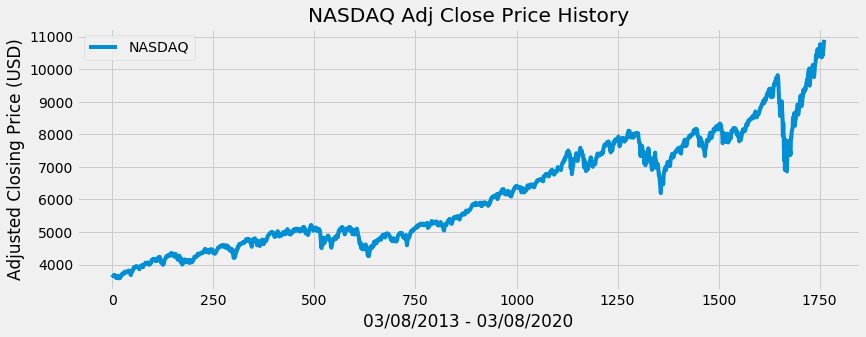

In [37]:
plt.figure(figsize=(12.5, 4.5))
plt.plot(NASDAQ_df['Adj Close'], label = 'NASDAQ')
plt.title('NASDAQ Adj Close Price History')
plt.xlabel('03/08/2013 - 03/08/2020')
plt.ylabel('Adjusted Closing Price (USD)')
plt.legend(loc='upper left')
plt.show()

In [38]:
# SHORT TERM AVERAGE
NASDAQ_30 =pd.DataFrame()
NASDAQ_30['Adj Close']= NASDAQ_df['Adj Close'].rolling(window= 30).mean()
NASDAQ_30

,Adj Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1757,10287.356347
1758,10308.925358
1759,10331.501334
1760,10358.241992


In [39]:
# LONG TERM AVERAGE / SIMPLE MOVING 100 DAY AVERAGE
NASDAQ100 = pd.DataFrame()
NASDAQ100['Adj Close']= NASDAQ_df['Adj Close'].rolling(window=100).mean()
NASDAQ100

,Adj Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1757,9074.495781
1758,9094.168984
1759,9120.540278
1760,9144.550473


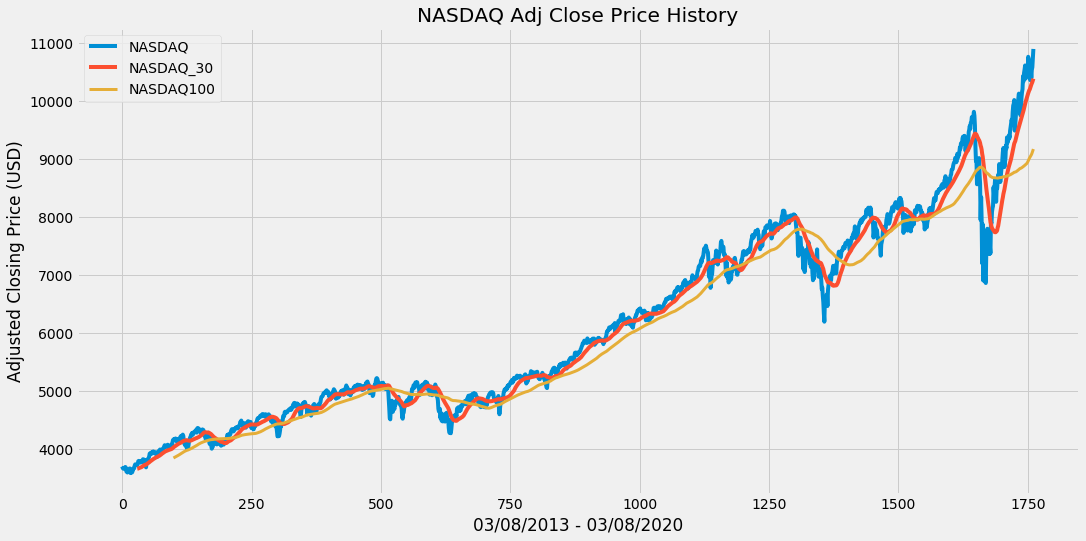

In [44]:
#plt.figure(figsize=(12.5, 4.5))
plt.figure(figsize=(16,8))
plt.plot(NASDAQ_df['Adj Close'], label = 'NASDAQ')

#plt.plot(sp500_df_tmp['Date'], sp500_df_tmp['Adj Close'], linewidth=3, color='blue')

plt.plot(NASDAQ_30['Adj Close'], label = 'NASDAQ_30', linewidth=4)
plt.plot(NASDAQ100['Adj Close'], label = 'NASDAQ100', linewidth=3)
plt.title('NASDAQ Adj Close Price History')
plt.xlabel('03/08/2013 - 03/08/2020')
plt.ylabel('Adjusted Closing Price (USD)')
plt.legend(loc='upper left')
plt.show()

# ANYTIME NASDAQ_30 CROSSES NASDAQ100 THAT WOULD BE A SIGNAL TO BUY 
# THE ORANGE LINE IS THE SHORT TERM AVGE

In [48]:
#DataFrame to store all the Data
data = pd.DataFrame()
data['NASDAQ_df'] = NASDAQ_df['Adj Close']
data['NASDAQ_30'] = NASDAQ_30['Adj Close']
data['NASDAQ100'] = NASDAQ100['Adj Close']
data

,NASDAQ_df,NASDAQ_30,NASDAQ100
0,3692.949951,NaN,NaN
1,3665.770020,NaN,NaN
2,3654.010010,NaN,NaN
3,3669.120117,NaN,NaN
4,3660.110107,NaN,NaN
...,...,...,...
1757,10402.089840,10287.356347,9074.495781
1758,10542.940430,10308.925358,9094.168984
1759,10587.809570,10331.501334,9120.540278
1760,10745.269530,10358.241992,9144.550473


In [61]:
# Function that Returns the Buy and Sell Price
# When to Buy or Sell
def buy_sell(data):
    
    sigPriceBuy = []
    sigPriceSell = []
    flag = 1
    
    for i in range(len(data)):
        if data['NASDAQ_30'][i] > data['NASDAQ_30'][i]:
            if flag !=1:
                sigPriceBuy.append(data['NASDAQ_30'][i])
                sigPriceSell.append(np.nan)
                flag = 1
            else:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)
        elif data['NASDAQ_30'][i] < data['NASDAQ100'][i]:
            if flag != 0:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(data['NASDAQ_df'][i])
            else:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)
        else:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)

    return (sigPriceBuy,sigPriceSell)
            

In [63]:
#buy_sell = buy_sell(data)
##data['Buy_Signal_Price'] = buy_sell[0]
#data['Sell_Signal_Price'] = buy_sell[1]

AttributeError: module 'datetime' has no attribute 'nan'